# E-tivity 1: Exploratory Data Analysis

The question i will examine later in this work is: Are there correlations in the demographics of the customers who signed up for previous campaigns.

### Import required modules and dataset

In [202]:
#import required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [203]:
#load bank data - bank.csv
df = pd.read_csv("bank.csv")

### Examine the data

Looking at the data to get an idea of the data in our dataset. There is a combination of numerical and categorical data in the dataset.

In [204]:
# First 10 rows of the dataframe
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32.0,technician,single,tertiary,no,392,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,39.0,technician,divorced,secondary,no,688,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,59.0,retired,married,secondary,no,1035,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,47.0,blue-collar,married,secondary,no,398,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,54.0,retired,married,secondary,no,1004,yes,no,cellular,1,apr,479,1,307,1,failure,no
5,46.0,self-employed,divorced,tertiary,no,926,yes,no,cellular,1,apr,463,1,133,3,failure,no
6,34.0,blue-collar,married,secondary,no,1924,yes,yes,cellular,1,apr,161,2,253,1,failure,no
7,45.0,services,divorced,secondary,no,396,yes,yes,cellular,1,apr,251,4,329,4,failure,no
8,58.0,management,divorced,tertiary,no,315,yes,no,cellular,1,apr,121,2,135,2,failure,no
9,49.0,management,divorced,tertiary,no,20727,no,no,cellular,1,apr,285,3,132,2,failure,no


In [205]:
# Last 10 rows of the dataframe
df.tail(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1990,36.0,technician,married,tertiary,no,376,no,no,cellular,16,sep,173,1,-1,0,NaN,yes
1991,39.0,admin.,divorced,secondary,no,112,no,no,cellular,16,sep,574,3,-1,0,NaN,yes
1992,78.0,retired,divorced,primary,no,527,no,no,cellular,16,sep,193,1,-1,0,NaN,yes
1993,35.0,management,married,NaN,no,2326,yes,yes,cellular,16,sep,319,1,-1,0,NaN,yes
1994,26.0,student,single,secondary,no,655,no,no,cellular,16,sep,190,1,-1,0,NaN,yes
1995,20.0,student,single,NaN,no,2785,no,no,cellular,16,sep,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,secondary,no,127,no,no,cellular,16,sep,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,primary,no,1154,no,no,telephone,17,sep,231,1,-1,0,NaN,yes
1998,46.0,services,married,primary,no,4343,yes,no,NaN,20,sep,185,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,secondary,no,6403,no,no,cellular,22,sep,208,2,-1,0,NaN,yes


In [206]:
# Print summary for numerical attributes
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,1988.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,41.753018,1413.663500,13.851500,292.020500,1.909500,167.896000,2.561500
std,12.724358,3131.224213,9.712189,221.557295,1.378862,131.754126,3.400735
min,18.000000,-980.000000,1.000000,7.000000,1.000000,-1.000000,0.000000
25%,32.000000,201.500000,5.000000,146.000000,1.000000,75.750000,1.000000
50%,38.000000,551.000000,12.000000,236.000000,1.000000,182.000000,2.000000
75%,50.000000,1644.500000,23.000000,379.000000,2.000000,251.000000,3.000000
max,93.000000,81204.000000,31.000000,1823.000000,11.000000,854.000000,55.000000


From the head, tail and describe functions i can deduce that there are 2000 rows of data and that age has 12 missing values. I can see that there are also missing values in the education, contact and poutcome columns represented by 'NaN'.

I can use a heatmap to examine the correlation matrix of these numerical values and also get the value of correlation.

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.139874,0.042411,0.076732,-0.002876,0.009121,0.063805
balance,0.139874,1.000000,0.037078,0.096633,0.025103,-0.033014,0.030292
day,0.042411,0.037078,1.000000,0.058597,-0.019719,0.054188,0.063716
duration,0.076732,0.096633,0.058597,1.000000,-0.005188,-0.095650,-0.015965
campaign,-0.002876,0.025103,-0.019719,-0.005188,1.000000,0.030929,0.140995
pdays,0.009121,-0.033014,0.054188,-0.095650,0.030929,1.000000,0.218636
previous,0.063805,0.030292,0.063716,-0.015965,0.140995,0.218636,1.000000


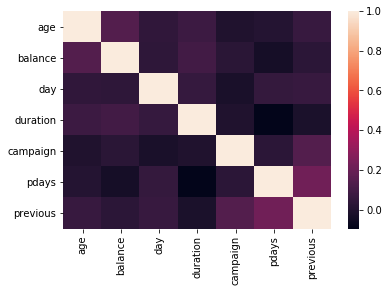

In [207]:
sns.heatmap(df.corr())
df.corr()

Now i drop all rows that have missing data in them which leaves 1452 rows. This result means that 548 rows have been dropped.

I then convert all data to numerical data to allow me to create a heatmap of all to find correlations.

In [208]:
data=df.dropna()

In [209]:
data.count()

age           1452
job           1452
marital       1452
education     1452
default       1452
balance       1452
housing       1452
loan          1452
contact       1452
day           1452
month         1452
duration      1452
campaign      1452
pdays         1452
previous      1452
poutcome      1452
subscribed    1452
dtype: int64

In [210]:
data = data.apply(lambda col: pd.factorize(col, sort=True)[0])

In [211]:
data.tail(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1956,13,4,2,2,0,210,0,0,0,22,11,366,1,43,3,2,1
1957,39,4,1,2,0,950,0,0,0,22,11,219,0,43,2,2,1
1958,10,6,2,2,0,460,0,0,0,22,11,246,3,120,0,2,1
1959,20,4,2,2,0,909,1,0,0,23,11,207,1,287,1,2,1
1960,29,4,1,2,0,608,1,1,0,23,11,224,0,42,13,2,1
1961,35,7,0,1,0,67,0,0,0,26,11,237,5,129,3,2,1
1962,18,7,1,1,0,826,0,0,0,27,11,255,1,123,0,2,1
1963,28,4,2,2,0,278,1,0,0,27,11,473,1,43,11,2,1
1964,41,5,1,1,0,77,0,0,0,28,11,207,0,43,2,2,1
1965,8,4,2,2,0,322,0,0,0,28,11,534,0,167,3,2,1


In [212]:
data.count()

age           1452
job           1452
marital       1452
education     1452
default       1452
balance       1452
housing       1452
loan          1452
contact       1452
day           1452
month         1452
duration      1452
campaign      1452
pdays         1452
previous      1452
poutcome      1452
subscribed    1452
dtype: int64

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
age,1.000000,-0.032122,-0.445378,-0.243752,-0.018242,0.125808,-0.140541,-0.002593,0.201786,0.030085,0.066296,0.110590,-0.041648,-0.103495,0.029083,0.086846,0.105968
job,-0.032122,1.000000,0.036366,0.102465,-0.047571,0.034864,-0.118974,-0.000537,-0.052768,0.049996,0.008047,0.058373,0.005952,-0.003284,-0.001884,0.029824,0.059794
marital,-0.445378,0.036366,1.000000,0.152802,-0.040618,-0.012977,-0.059915,-0.053955,-0.033060,0.018449,0.058607,0.003686,0.026535,0.020819,0.023716,0.083479,0.117234
education,-0.243752,0.102465,0.152802,1.000000,0.019003,0.043314,-0.066651,-0.004677,-0.101163,0.052586,0.094687,-0.006236,0.011458,-0.081058,0.034364,0.100906,0.112186
default,-0.018242,-0.047571,-0.040618,0.019003,1.000000,-0.102976,-0.017459,0.082836,-0.023606,-0.003412,-0.020849,-0.074305,0.015177,0.020776,-0.043910,-0.061793,-0.058973
balance,0.125808,0.034864,-0.012977,0.043314,-0.102976,1.000000,-0.169923,-0.123162,0.117296,0.076167,0.130618,0.151669,0.015474,-0.091759,0.067225,0.173411,0.248570
housing,-0.140541,-0.118974,-0.059915,-0.066651,-0.017459,-0.169923,1.000000,0.143652,-0.081480,-0.082918,-0.256927,-0.270480,0.023880,0.294961,-0.072985,-0.396005,-0.505528
loan,-0.002593,-0.000537,-0.053955,-0.004677,0.082836,-0.123162,0.143652,1.000000,-0.006792,0.025803,-0.119107,-0.138904,0.011163,0.044356,-0.037205,-0.212370,-0.268667
contact,0.201786,-0.052768,-0.033060,-0.101163,-0.023606,0.117296,-0.081480,-0.006792,1.000000,0.015729,0.021730,0.011813,0.024433,-0.005444,0.046411,0.016956,0.037611
day,0.030085,0.049996,0.018449,0.052586,-0.003412,0.076167,-0.082918,0.025803,0.015729,1.000000,0.149209,0.053177,-0.058567,0.000842,0.047432,0.046223,0.106503


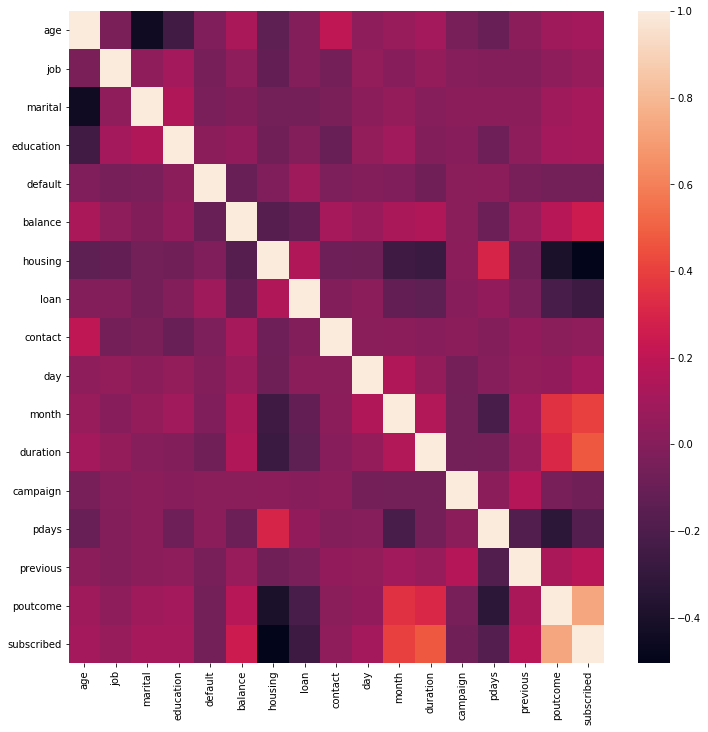

In [213]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(data.corr())
data.corr()

The heatmap highlights a strong correlation between 'poutcome' and 'subscription' and also correlations between: 

   -  duration and subscribed
   -  balance and subscribed
   -  month and subscribed        


In [214]:
#get the data for subscribed and month to highlight which month was most successful in the campaign
datamthsub = data[['month','subscribed']].dropna()

In [215]:
datamthsub.describe()

,month,subscribed
count,1452.000000,1452.000000
mean,4.584022,0.452479
std,3.132580,0.497908
min,0.000000,0.000000
25%,3.000000,0.000000
50%,4.000000,0.000000
75%,7.000000,1.000000
max,11.000000,1.000000


Getting the successful subscriptions to term deposits (subscribed = 1)

In [216]:
rslt_df = datamthsub[datamthsub['subscribed'] == 1] 
print('\nResult dataframe :\n', rslt_df) 





Result dataframe :
       month  subscribed
1001      0           1
1002      0           1
1004      0           1
1005      0           1
1007      0           1
...     ...         ...
1961     11           1
1962     11           1
1963     11           1
1964     11           1
1965     11           1

[657 rows x 2 columns]


Grouping the data by month (getting the number of subscriptions per month)

In [217]:
dffiltered = rslt_df.groupby(
  pd.Grouper(
    key='month'
  )
).size()

In [218]:
dffiltered.head(12)

month
0      67
1      98
2      10
5     105
6      67
7      40
8      92
9      23
10     62
11     93
dtype: int64

From this resulting data I can see that there were no subscription in the months: April and May. We can also see that the most succesful month was June with 105 subscriptions.

### Looking at previous outcome data

The column 'poutcome' in the dataset displays the results of the previous campaign. Now lets create a frequency table for 'poutcome' and plot it:

In [219]:
frequency_table = df['poutcome'].value_counts(ascending=True)
print('Frequency Table for Previous Outcomes:') 
print(frequency_table)

Frequency Table for Previous Outcomes:
other      147
success    444
failure    955
Name: poutcome, dtype: int64


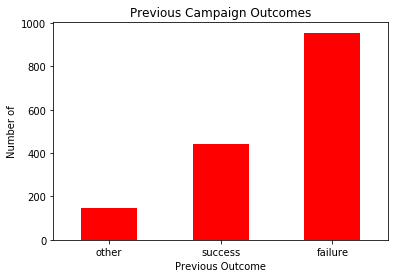

In [220]:
frequency_table.plot(kind='bar',color='red', rot=0)
plt.xlabel('Previous Outcome')
plt.ylabel('Number of')
plt.title('Previous Campaign Outcomes')
plt.show()

From this data we can see that failure was the most common outcome but i would like to examine the successes further and see if there are correlations.

### Question: What are the demographics of the customers who signed up for previous campaigns.

In [221]:
#Using the original dataset
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,1988.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,41.753018,1413.663500,13.851500,292.020500,1.909500,167.896000,2.561500
std,12.724358,3131.224213,9.712189,221.557295,1.378862,131.754126,3.400735
min,18.000000,-980.000000,1.000000,7.000000,1.000000,-1.000000,0.000000
25%,32.000000,201.500000,5.000000,146.000000,1.000000,75.750000,1.000000
50%,38.000000,551.000000,12.000000,236.000000,1.000000,182.000000,2.000000
75%,50.000000,1644.500000,23.000000,379.000000,2.000000,251.000000,3.000000
max,93.000000,81204.000000,31.000000,1823.000000,11.000000,854.000000,55.000000


We can create a new dataframe that just has the columns we need to examine this data further.

In [222]:
prevSuccData = df[['poutcome','age','job','education','marital','loan','housing']]
prevSuccData.head()

,poutcome,age,job,education,marital,loan,housing
0,failure,32.0,technician,tertiary,single,no,yes
1,failure,39.0,technician,secondary,divorced,yes,yes
2,failure,59.0,retired,secondary,married,yes,yes
3,failure,47.0,blue-collar,secondary,married,yes,yes
4,failure,54.0,retired,secondary,married,no,yes


As these columns still contain all results for 'poutcome' we will now need to only keep those that were successful outcomes:

In [223]:
prevSuccData = prevSuccData[prevSuccData.poutcome == 'success']
print(prevSuccData)

     poutcome   age          job  education   marital loan housing
78    success  31.0  blue-collar  secondary   married   no     yes
765   success  48.0   technician  secondary   married   no     yes
794   success  37.0   technician   tertiary    single   no      no
795   success   NaN   technician   tertiary    single   no     yes
796   success  52.0   unemployed  secondary   married   no      no
...       ...   ...          ...        ...       ...  ...     ...
1961  success  55.0     services  secondary  divorced   no      no
1962  success  38.0     services  secondary   married   no      no
1963  success  48.0   management   tertiary    single   no     yes
1964  success  61.0      retired  secondary   married   no      no
1965  success  28.0   management   tertiary    single   no      no

[444 rows x 7 columns]



After creating a dataframe of only those who have a previous outcome of success we are left with 444 rows.
We now need to check for missing data.

From the count we can see the following data is missing:<br>
 - Age - 3 values<br>
 - Job - 3 values<br>
 - Education - 34 values<br>

In [224]:
prevSuccData.head()

,poutcome,age,job,education,marital,loan,housing
78,success,31.0,blue-collar,secondary,married,no,yes
765,success,48.0,technician,secondary,married,no,yes
794,success,37.0,technician,tertiary,single,no,no
795,success,NaN,technician,tertiary,single,no,yes
796,success,52.0,unemployed,secondary,married,no,no


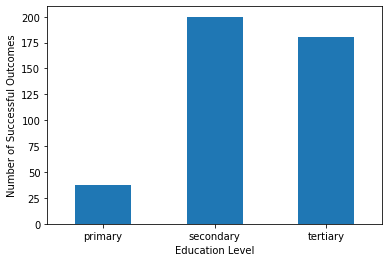

In [225]:
crosstabplt = pd.crosstab(prevSuccData['education'].dropna(), prevSuccData['poutcome'])
crosstabplt.plot(kind='bar', stacked=True, rot=0,legend=None)
plt.ylabel('Number of Successful Outcomes')
plt.xlabel('Education Level')
plt.show()

Education: Here we can see that Secondary and Tertiary were the most common.

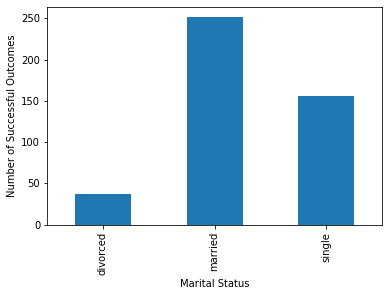

In [226]:
crosstabplt = pd.crosstab(prevSuccData['marital'].dropna(), prevSuccData['poutcome'])
crosstabplt.plot(kind='bar', stacked=True, legend=None)
plt.ylabel('Number of Successful Outcomes')
plt.xlabel('Marital Status')
plt.show()

Marital: here we can see that Married was the most common.

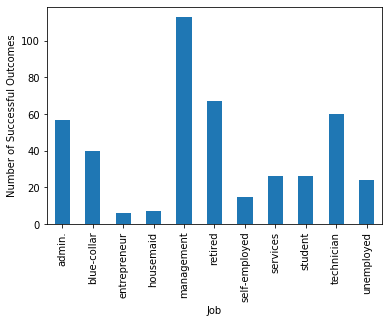

In [227]:
crosstabplt = pd.crosstab(prevSuccData['job'].dropna(), prevSuccData['poutcome'])
crosstabplt.plot(kind='bar', stacked=True, legend = None)
plt.ylabel('Number of Successful Outcomes')
plt.xlabel('Job')
plt.show()

Job: Here we can see the most common jobs was Management.

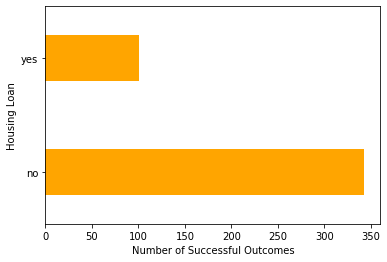

In [228]:
crosstabplt = pd.crosstab(prevSuccData['housing'], df['poutcome'])
crosstabplt.plot(kind='barh',width=0.4, stacked=True, legend=None, color='orange')
plt.xlabel('Number of Successful Outcomes')
plt.ylabel('Housing Loan')
plt.show()

Housing: No housing loan was the most common.

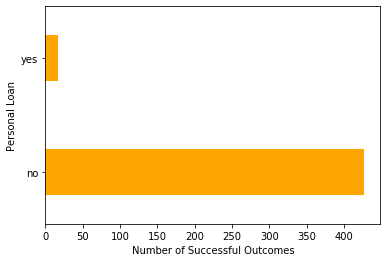

In [229]:
crosstabplt = pd.crosstab(prevSuccData['loan'], prevSuccData['poutcome'])
crosstabplt.plot(kind='barh',width=0.4, stacked=True, legend=None, color='orange')
plt.xlabel('Number of Successful Outcomes')
plt.ylabel('Personal Loan')
plt.show()

Personal Loan: No Personal Loan was the most common.

Combining Personal and Housing loans also gives us some interesting data. First we look at all data and secondly we look at only those that were successful in a previous campaign

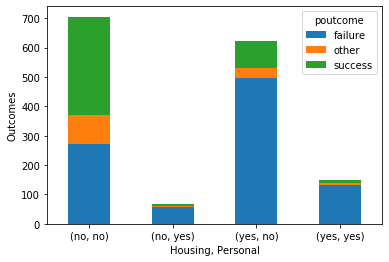

In [230]:
crosstabplt = pd.crosstab([df['housing'], df['loan']], df['poutcome'])
crosstabplt.plot(kind='bar', stacked=True, grid=False, rot=0)
plt.ylabel('Outcomes')
plt.xlabel('Housing, Personal')
plt.show()

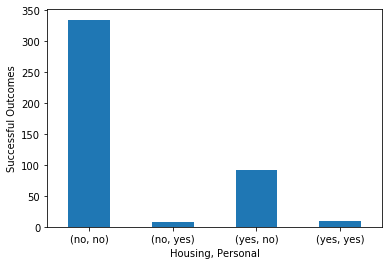

In [231]:
crosstabplt = pd.crosstab([prevSuccData['housing'], prevSuccData['loan']], prevSuccData['poutcome'])
crosstabplt.plot(kind='bar', stacked=True, grid=False,legend=None, rot=0)
plt.ylabel('Successful Outcomes')
plt.xlabel('Housing, Personal')
plt.show()

From the two charts above we can see that the most successful poutcome of the previous campaign had neither a housing nor a personal loan.

Some further analysis:

In [232]:
prevSuccDataNumeric=prevSuccData.dropna()
prevSuccDataNumeric = prevSuccDataNumeric.apply(lambda col: pd.factorize(col, sort=True)[0])

In [233]:
prevSuccDataNumeric.head()

,poutcome,age,job,education,marital,loan,housing
78,0,11,1,1,1,0,1
765,0,28,9,1,1,0,1
794,0,17,9,2,2,0,0
796,0,32,10,1,1,0,0
797,0,2,0,2,2,0,1


,poutcome,age,job,education,marital,loan,housing
poutcome,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,NaN,1.000000,-0.011426,-0.292930,-0.595720,-0.024797,-0.128233
job,NaN,-0.011426,1.000000,0.014325,0.062189,-0.053573,-0.186828
education,NaN,-0.292930,0.014325,1.000000,0.224384,0.003492,0.004419
marital,NaN,-0.595720,0.062189,0.224384,1.000000,-0.072864,0.011161
loan,NaN,-0.024797,-0.053573,0.003492,-0.072864,1.000000,0.147182
housing,NaN,-0.128233,-0.186828,0.004419,0.011161,0.147182,1.000000


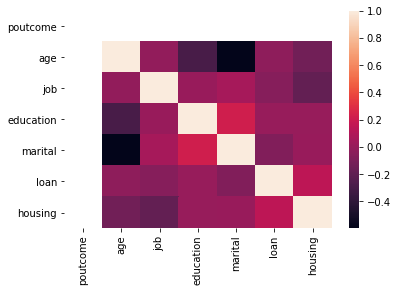

In [234]:
#fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(prevSuccDataNumeric.corr())
prevSuccDataNumeric.corr()

## Conclusion.

The question we asked was: Are there correlations in the demographics of the customers who signed up for previous campaigns. From the analysis we can see the people who signed up for the previous campaign were most likely to be:<br>
 - Educated to a Secondary or Tertiary level
 - To be married
 - To work in management
 - To not have a housing loan
 - To not have a personal loan